In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import io
from matplotlib import cm
from skimage.morphology import disk
from skimage.morphology import watershed
from scipy import ndimage as ndi
from skimage import feature
from skimage import color
from skimage.future import graph
from skimage import segmentation
from scipy import misc
from skimage import transform
from skimage import morphology

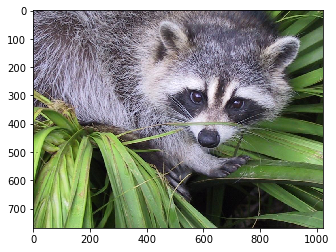

In [2]:
f = misc.face()
misc.imsave('face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [3]:
face = misc.imread('face.png')
face.shape, face.dtype
face.tofile('face.raw') # Create raw file
face_from_raw = np.fromfile('face.raw', dtype=np.uint8)
face_from_raw.shape

face_from_raw.shape = (768, 1024, 3)

In [4]:
face_memmap = np.memmap('face.raw', dtype=np.uint8, shape=(768, 1024, 3))
face_memmap

memmap([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ..., 
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ..., 
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ..., 
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ..., 
       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ..., 
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ..., 
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ..., 
        [120, 156,  95],
        [119, 155,  93],
        [118, 154

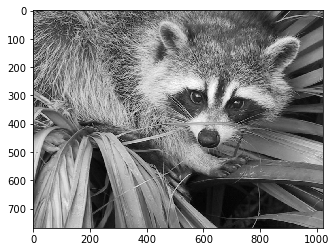

In [5]:
f = misc.face(gray=True)  # retrieve a grayscale image
import matplotlib.pyplot as plt
plt.imshow(f, cmap="gray")
plt.show()

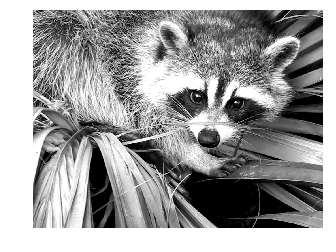

In [6]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)        

# Remove axes and ticks
plt.axis('off')
plt.show()

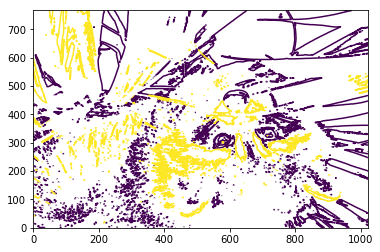

In [7]:
plt.contour(f, [50, 200])     
plt.show()

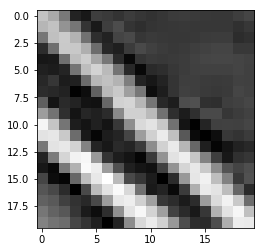

In [8]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray)        
plt.show()

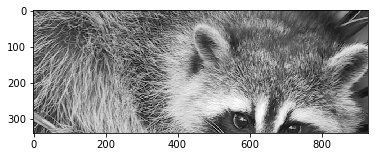

In [9]:
plt.imshow(f[:340, :930], cmap=plt.cm.gray, interpolation='nearest')
plt.show()

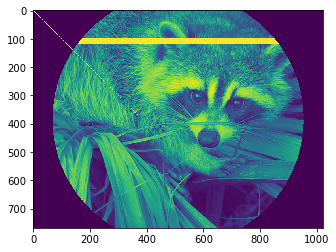

In [10]:
face = misc.face(gray=True)
face[0, 40]

# Slicing
face[10:13, 20:23]

face[100:120] = 255

lx, ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
# Masks
face[mask] = 0
# Fancy indexing
face[range(400), range(400)] = 255
plt.imshow(face)
plt.show()

In [11]:
face = misc.face(gray=True)
face.mean()

face.max(), face.min()


(250, 0)

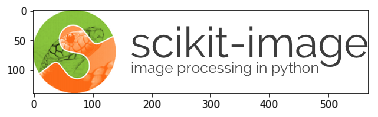

In [12]:
sciimage = io.imread("http://scikit-image.org/_static/img/logo.png",interpolation='nearest')

plt.imshow(sciimage)
plt.show()

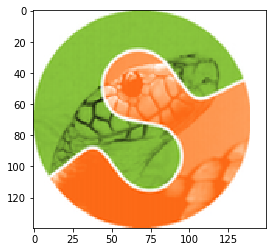

In [13]:
plt.imshow(sciimage[:,:150], cmap=plt.cm.gray)
plt.show()

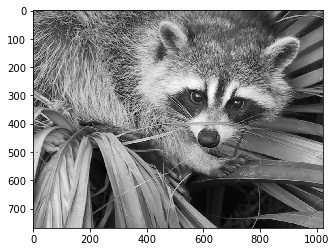

In [14]:
sciimage1 = io.imread("http://www.scipy-lectures.org/_images/face.png", flatten = True)

plt.imshow(sciimage1,cmap="gray")
plt.show()

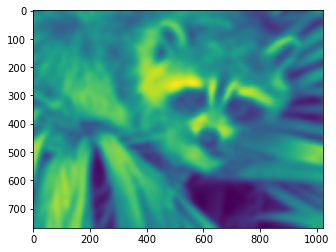

C:\Users\Shyam\Anaconda2\envs\snakes\lib\site-packages\skimage\filters\_gaussian.py:13: skimage_deprecation: Call to deprecated function ``gaussian_filter``. Use ``skimage.filters.gaussian`` instead.
  multichannel=None):


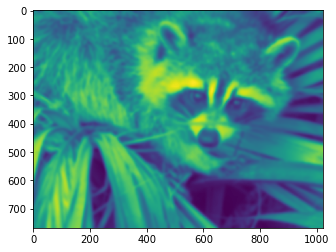

In [15]:
from skimage import filters
blurred_face = filters.gaussian(sciimage1, sigma=10,multichannel=False)
plt.imshow(blurred_face)
plt.show()
very_blurred = filters.gaussian_filter(sciimage1, sigma=5)
plt.imshow(very_blurred)
plt.show()


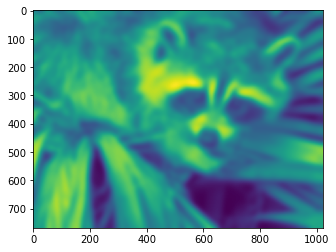

In [16]:
filter_blurred_face = filters.gaussian(blurred_face, sigma=1,multichannel=False)
alpha = 30
sharpened = blurred_face + alpha *(blurred_face - filter_blurred_face)
plt.imshow(filter_blurred_face)
plt.show()

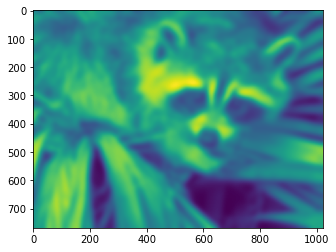

In [17]:
filter_blurred_face = filters.gaussian(blurred_face, sigma=1,multichannel=False)
alpha = 30
#sharpened = blurred_face + alpha *(blurred_face - filter_blurred_face)
plt.imshow(filter_blurred_face)
plt.show()

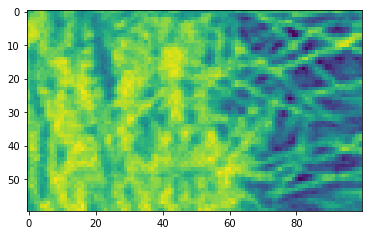

In [18]:
sciimage1_d = sciimage1[230:290, 220:320]
noisy = sciimage1_d + 0.4 * sciimage1_d.std() * np.random.random(sciimage1_d.shape)
plt.imshow(noisy)
plt.show()

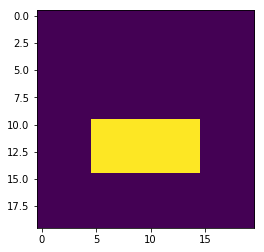

In [19]:
im = np.zeros((20, 20))
im[10:-5, 5:-5] = 1
plt.imshow(im)
plt.show()

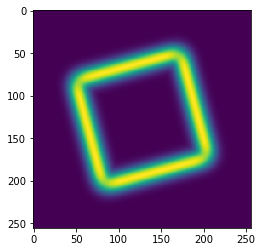

In [20]:
im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1

im = transform.rotate(im, 15, mode='constant')
im = filters.gaussian(im, 8)
sx = filters.sobel(im)
#sy = ndimage.sobel(im, axis=1, mode='constant')
#sob = np.hypot(sx, sy)
plt.imshow(sx)
plt.show()

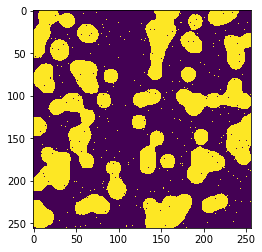

In [21]:
n = 10
l = 256
im = np.zeros((l, l))
np.random.seed(1)
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = filters.gaussian(im, sigma=l/(4.*n))

mask = (im > im.mean()).astype(np.float)
mask += 0.1 * im
img = mask + 0.2*np.random.randn(*mask.shape)

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

binary_img = img > 0.5
plt.imshow(binary_img)
plt.show()

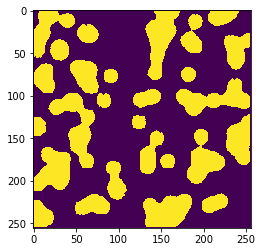

In [22]:
# Remove small white regions
open_img = morphology.binary_opening(binary_img)
# Remove small black hole
close_img = morphology.binary_closing(open_img)
plt.imshow(close_img)
plt.show()

In [23]:
eroded_img = morphology.binary_erosion(binary_img)
reconstruct_img = morphology.binary_propagation(eroded_img, mask=binary_img)
tmp = np.logical_not(reconstruct_img)
eroded_tmp = morphology.binary_erosion(tmp)
reconstruct_final = np.logical_not(ndimage.binary_propagation(eroded_tmp, mask=tmp))
np.abs(mask - close_img).mean() 

np.abs(mask - reconstruct_final).mean() 

AttributeError: module 'skimage.morphology' has no attribute 'binary_propagation'

In [84]:
import mahotas as mh
dna = mh.imread('../images_assignment/circles.png')
#dna = mh.imread('../images_assignment/objects.png')

dna

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

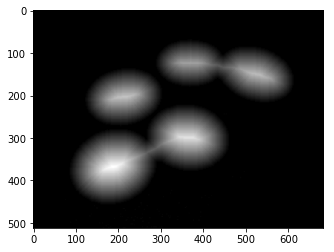

In [85]:
plt.imshow(dna, cmap="gray")
plt.show()

In [86]:
print(dna.shape)
print(dna.dtype)
print(dna.max())
print(dna.min())

(512, 683)
uint8
254
0


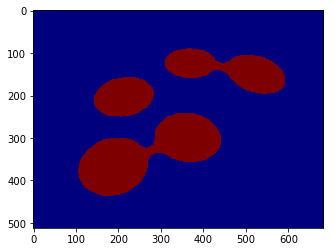

In [87]:
T = mh.thresholding.otsu(dna)
plt.imshow(dna > T)
plt.show()

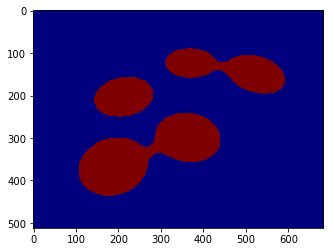

In [88]:
dnaf = mh.gaussian_filter(dna, 8).astype(np.uint8)
T = mh.thresholding.otsu(dnaf)
plt.imshow(dnaf > T)
plt.show()

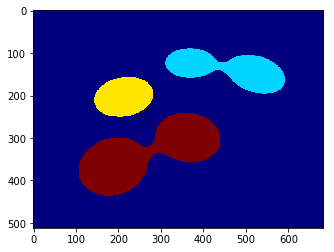

In [89]:
labeled,nr_objects = mh.label(dnaf > T)
plt.imshow(labeled)
plt.jet()
plt.show()

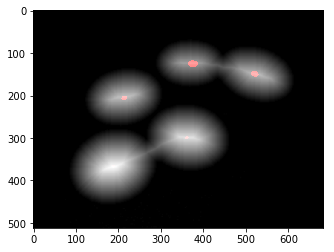

In [90]:
dnaf = mh.gaussian_filter(dna,40).astype(np.uint8)
rmax = mh.regmax(dnaf)
plt.imshow(mh.overlay(dna, rmax))
plt.show()

In [91]:
seeds,nr_nuclei = mh.label(rmax)
print(nr_nuclei)

5


C:\Users\Shyam\Anaconda2\envs\snakes\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


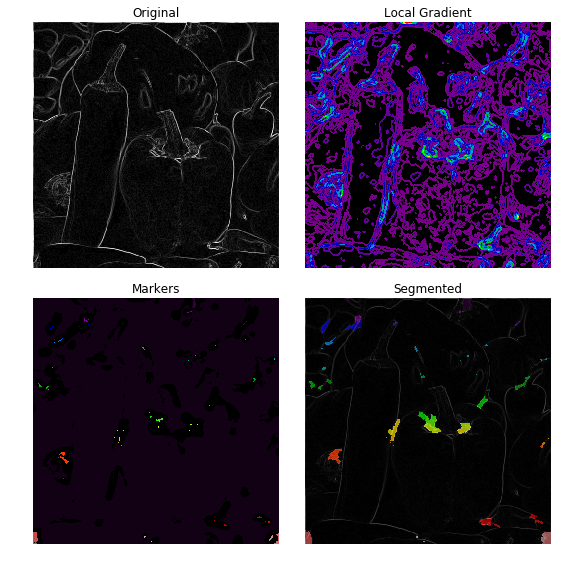

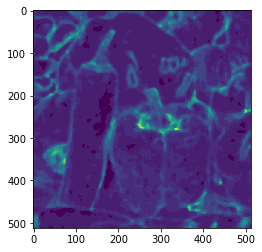

Number of coins (method 2): 50


In [183]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import watershed, disk, closing, square
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte
from skimage.measure import regionprops,label
dna = io.imread('../images_assignment/peppers.png',as_grey=True)
#dna = data.coins()
image = img_as_ubyte(filters.sobel(dna))

# denoise image
denoised = rank.median(image, disk(6))


# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(image, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.spectral, interpolation='nearest')
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.spectral, interpolation='nearest')
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(labels, cmap=plt.cm.spectral, interpolation='nearest', alpha=.7)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()


plt.imshow(denoised)
plt.show()
regions = regionprops(labels)
regions = [r for r in regions if r.area > 20]
print('Number of coins (method 2):', len(regions) - 1)


In [112]:
rank.gradient(denoised, disk(2))

array([[11, 17, 17, ..., 68, 10,  5],
       [17, 17, 12, ..., 75, 32,  5],
       [17, 12, 12, ..., 70, 32,  7],
       ..., 
       [ 8, 10, 11, ...,  1,  1,  1],
       [ 8, 11, 11, ...,  1,  1,  0],
       [ 8, 11, 14, ...,  3,  1,  0]], dtype=uint8)

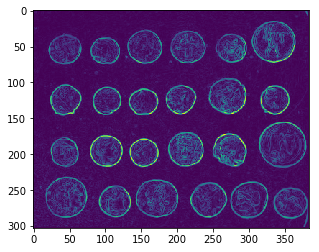

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [71]:
from skimage.feature import canny
from scipy import ndimage as ndi
coins = data.coins()
#coins = io.imread('../images_assignment/peppers.png',as_grey=True)
edges = canny(coins)
fill_coins = ndi.binary_fill_holes(edges)

label_objects, nb_labels = ndi.label(fill_coins)
sizes = np.bincount(label_objects.ravel())
mask_sizes1 = sizes > 20
mask_sizes[0]= 0
coins_cleaned = mask_sizes[label_objects]



plt.imshow(coins_cleaned)
plt.show()
# imread(../images_assignment/peppers.png',as_grey=True)
coins_cleaned

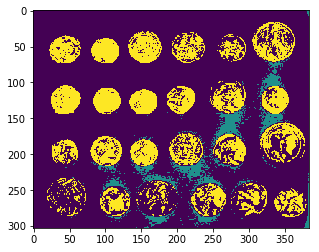

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.17208326,  0.04307036, ...,  0.03683979,
         0.00765711,  0.        ],
       [ 0.        ,  0.06139791,  0.02499519, ...,  0.084638  ,
         0.00490196,  0.        ],
       ..., 
       [ 0.        ,  0.03114192,  0.02949335, ...,  0.01669548,
         0.00588235,  0.        ],
       [ 0.        ,  0.04030354,  0.0335059 , ...,  0.00571662,
         0.00980392,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [185]:
coins = data.coins()
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

elevation_map = filters.sobel(coins)

segmentation = watershed(elevation_map, markers)
# segmentation = ndi.binary_fill_holes(segmentation - 1)
# labeled_coins, _ = ndi.label(segmentation)
plt.imshow(markers)
plt.show()
elevation_map

In [189]:
coins = (io.imread('../images_assignment/peppers.png',flatten=True)*100).astype(np.uint8)


elevation_map = img_as_ubyte(filters.sobel(coins))
#elevation_map = ndi.binary_fill_holes(elevation_map)

markers = np.zeros_like(coins)
markers[coins < 50] = 1
markers[coins > 150] = 2

#markers = ndi.binary_fill_holes(markers-1)

segmentation = watershed(elevation_map, markers)
#segmentation = ndi.binary_fill_holes(segmentation - 1)

plt.imshow(markers)
plt.show()
plt.imshow(elevation_map)
plt.show()
plt.imshow(segmentation)
plt.show()
segmentation

ValueError: Images of type float must be between -1 and 1.

In [187]:
coins = (io.imread('../images_assignment/peppers.png',flatten=True)*100).astype(np.uint8)


elevation_map = img_as_ubyte(filters.sobel(coins))
#elevation_map = ndi.binary_fill_holes(elevation_map)

markers = np.zeros_like(coins)
markers[coins < 50] = 1
markers[coins > 150] = 2

#markers = ndi.binary_fill_holes(markers-1)

segmentation = watershed(elevation_map, markers)
#segmentation = ndi.binary_fill_holes(segmentation - 1)

plt.imshow(markers)
plt.show()
plt.imshow(elevation_map)
plt.show()
plt.imshow(segmentation)
plt.show()
segmentation